# Exploratory Modelling - Association using Clustering Algorithms 

In this notebook, we use unsupervised machine learning algorithms, specifically clustering algorithms) to identify the clusters in a given dataset. 

Typically the dataset will be unlabelled, but for an improved learning experience, we use a labelled dataset that we have seen before, [IRIS](https://archive.ics.uci.edu/ml/datasets/iris). 

The input variables are sepallength, sepalwidth, petallength, petalwidth. We will only use the 'class' variable as a validation measure, to determine if the clusters are meaningful. 

## Importing libraries



Libraries are a collection of shared files (or modules) that contain functions for use by multiples programs. These allow for common functionality to be written once and repurposed as required. 

The Python [standard library](https://docs.python.org/3/library/) contains an extensive suite of modules that are built into Python by default. For additional functionality libraries are available from [PyPI](https://pypi.org/) (the Python Package Index).

In this next section we are going to import some libraries that are frequently used in AI and Machine Learning.

In the example given below you can see that we use the `import` keyword to load the library into our program. We make use of the `as` keyword to provide a shortcut `alias` for us to refer to the library in the program. Think of it as a shorthand notation.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The following two commands ignore some warnings which are generally thrown due to version updates.
import warnings
warnings.filterwarnings("ignore")

import numpy as np # Used for scientific computing and efficient multi dimensional array processing
import pandas as pd # Used for data analysis and manipulation - data frames

# Tools for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib import cm, colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import RegularPolygon, Ellipse
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

# K-Means clustering
from sklearn.cluster import KMeans

# Hierarchical clustering
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage

# SOM
!pip install minisom
from minisom import MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=12eeefb99bff934844ab23cb513d15ed29fd74491d8fb3bb566dc73db4e3e4b6
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


It is possible that some of the libraries that you are looking import are not available in Google Colaboratory by default. In order to provision the library in the environment you can install the library using the following command. 

*   Installing python libraries :
``` !pip install {library_name} ```
*   Installing system packages :
``` !apt-get install {package_name} ```

[reference](https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb)

## Preparing the data

In [2]:
#Upload the CSV file containing the dataset into this Colab instance.
#And then read it into a data frame. 
iris_dataset = pd.read_csv("/content/data/iris.csv")
#Preview the first 5 lines of the loaded data
iris_dataset.head(5)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data exploration

Datasets are converted to dataframes when working with Pandas. Pandas provides functions and attributes which allow you to work with the data in the dataframe. The most frequently used are,

* Dataframe functions (df.method())

  * head( [n] ), tail( [n] ) - first/last n rows
  * describe() - generate descriptive statistics (for numeric columns only)
  * max(), min() - return max/min values for all numeric columns
  * mean(), median() - return mean/median values for all numeric columns
  * std() - standard deviation
  * sample([n]) - returns a random sample of the data frame
  * dropna() - drop all the records with missing values

* Pandas dataframe attibutes (df.attribute)

  * dtypes - list the types of the columns
  * columns - list the column names
  * axes - list the row labels and column names
  * ndim - number of dimensions
  * size - number of elements
  * shape - return a tuple representing the dimensionality
  * values - numpy representation of the data

In [3]:
#view data types
iris_dataset.info()
#view basic stats
iris_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data visualisation

Now let's visualise the dataset using the Seaborn library. 

Matplotlib is the "standard" data viz library in Python. Although Seaborn is based on Matplotlib, it can be used to create graphs using a single line instead of multiple lines in Matplotlib. 

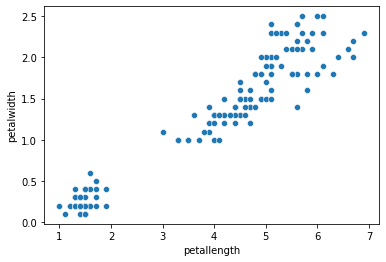

In [4]:
sns.scatterplot(x='petallength', y='petalwidth', data=iris_dataset)

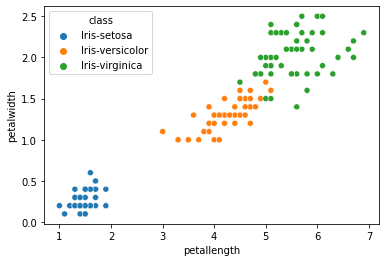

In [5]:
sns.scatterplot(x='petallength', y='petalwidth', hue='class', data=iris_dataset)

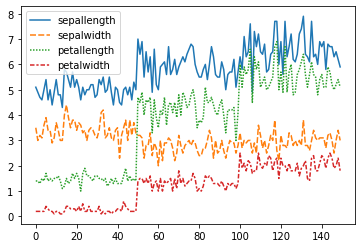

In [6]:
sns.lineplot(data=iris_dataset)

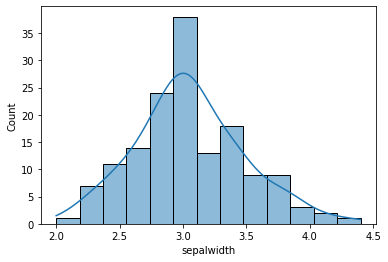

In [7]:
sns.histplot(data=iris_dataset, x='sepalwidth', kde=True)

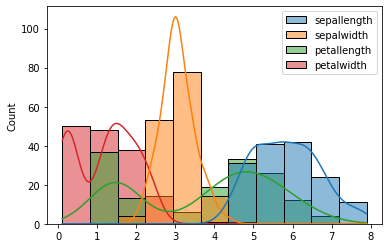

In [8]:
sns.histplot(data=iris_dataset, kde=True)

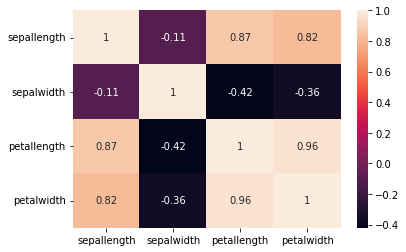

In [9]:
corr_matrix = iris_dataset.corr()
sns.heatmap(corr_matrix, annot=True)

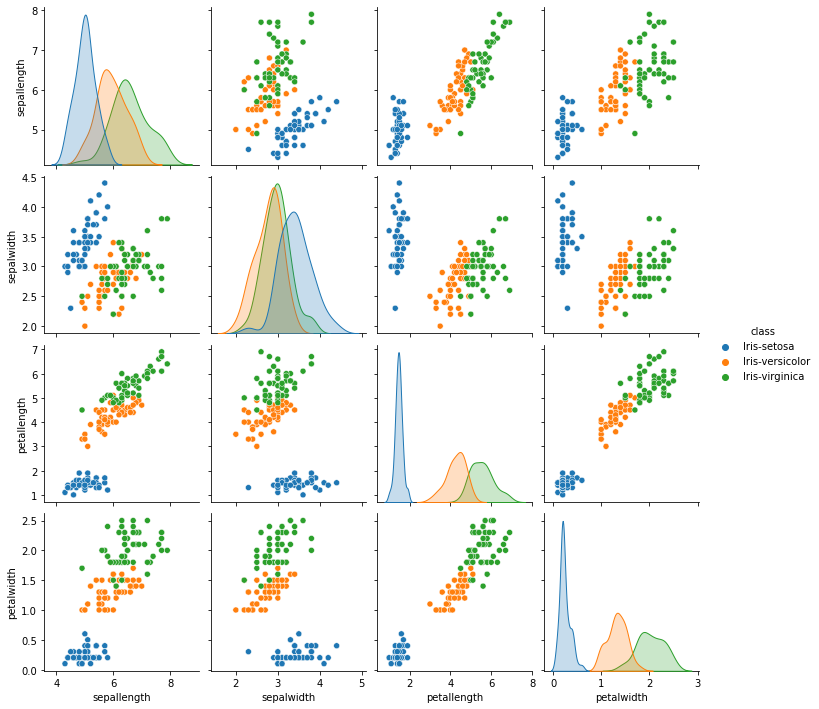

In [10]:
sns.pairplot(data=iris_dataset, hue = 'class')

## Building the models

### K-means clustering 

[What is k-means?](https://scikit-learn.org/stable/modules/clustering.html#k-means)

We define $k$ as the number of clusters we want the dataset segmented into, these are typically centroids, the imaginary or real location representing the center of the cluster. Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.
In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

In [11]:
# Separate input and output variables
# we only use the target variable for evaluation, not for building the model. 
X = iris_dataset.iloc[:, [0,1,2,3]].values
y = iris_dataset.iloc[:, 4].values

In [14]:
# KMeans clustering with predefined 3 clusters
# documentation on the parameters can be found here https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
km3 = KMeans(n_clusters = 3, random_state=21)
km3.fit(X)

KMeans(n_clusters=3, random_state=21)

In [15]:
# the centroids of the clusters
centers = km3.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


Text(0.5, 1.0, 'Actual')

Text(0.5, 1.0, 'KMeans 3 clusters')

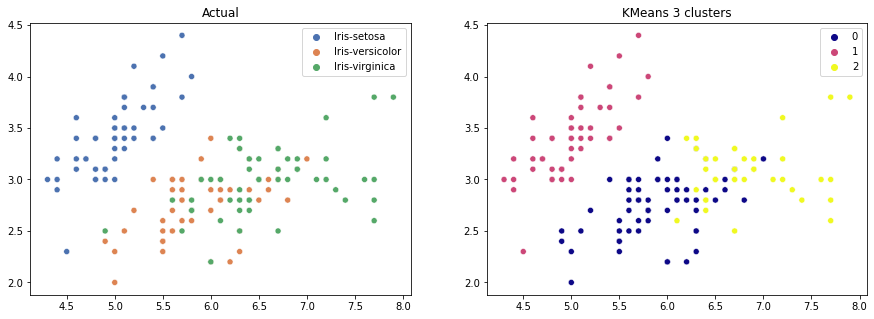

In [16]:
# plot the actual classes (using the class variable) and the clusters from KMeans, side by side.  
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(X[:, 0], X[:, 1], hue=y, ax=axes[0], palette="deep") # notice hue is based on y - the 'class' variable in the dataset
axes[0].set_title("Actual")
sns.scatterplot(X[:, 0], X[:, 1], hue=km3.labels_, ax=axes[1] , palette="plasma") # notice how we assign the hue based on cluster ID/label
axes[1].set_title("KMeans 3 clusters")

KMeans(n_clusters=4, random_state=21)

Text(0.5, 1.0, 'Actual')

Text(0.5, 1.0, 'KMeans 4 clusters')

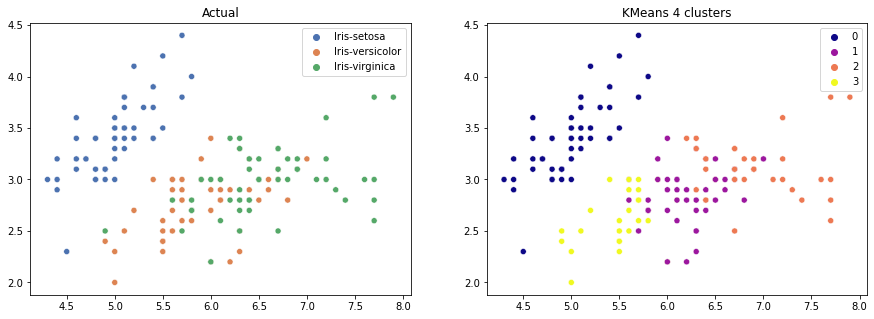

In [18]:
# how about we try four clusters?
km4 = KMeans(n_clusters = 4, random_state=21)
km4.fit(X)
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(X[:, 0], X[:, 1], hue=y, ax=axes[0], palette="deep") # notice hue is based on y - the 'class' variable in the dataset
axes[0].set_title("Actual")
sns.scatterplot(X[:, 0], X[:, 1], hue=km4.labels_, ax=axes[1], palette="plasma") # notice how we assign the hue based on cluster ID/label
axes[1].set_title("KMeans 4 clusters")

KMeans(n_clusters=5, random_state=21)

Text(0.5, 1.0, 'Actual')

Text(0.5, 1.0, 'KMeans 4 clusters')

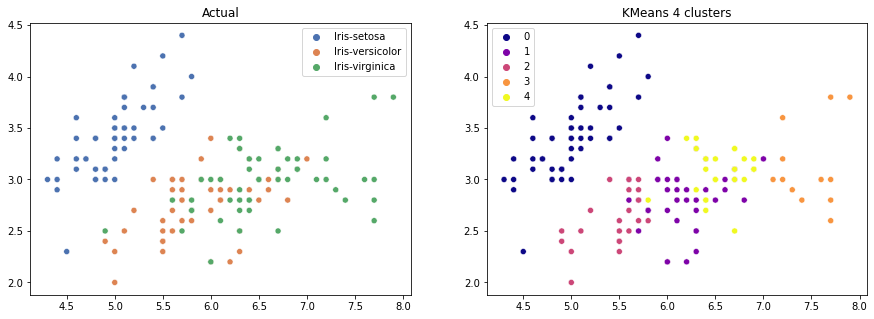

In [19]:
# and now five clusters
km5 = KMeans(n_clusters = 5, random_state=21)
km5.fit(X)
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(X[:, 0], X[:, 1], hue=y, ax=axes[0], palette="deep")
axes[0].set_title("Actual")
sns.scatterplot(X[:, 0], X[:, 1], hue=km5.labels_, ax=axes[1], palette="plasma")
axes[1].set_title("KMeans 4 clusters")

### Hierarchical Clustering

[What is Hierarchical Clustering?](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)


This clustering algorithm builds a hierarchy of clusters, starting with all the data points assigned to a cluster of their own, then the two nearest clusters are merged into the same cluster, and this repeats until there is only a single cluster left. The heirarchy of clusters can be shown in a dendrogram.


In [20]:
# Use the linkage() function and creating a distance matrix 
distance_matrix = linkage(X, method = 'ward', metric = 'euclidean')

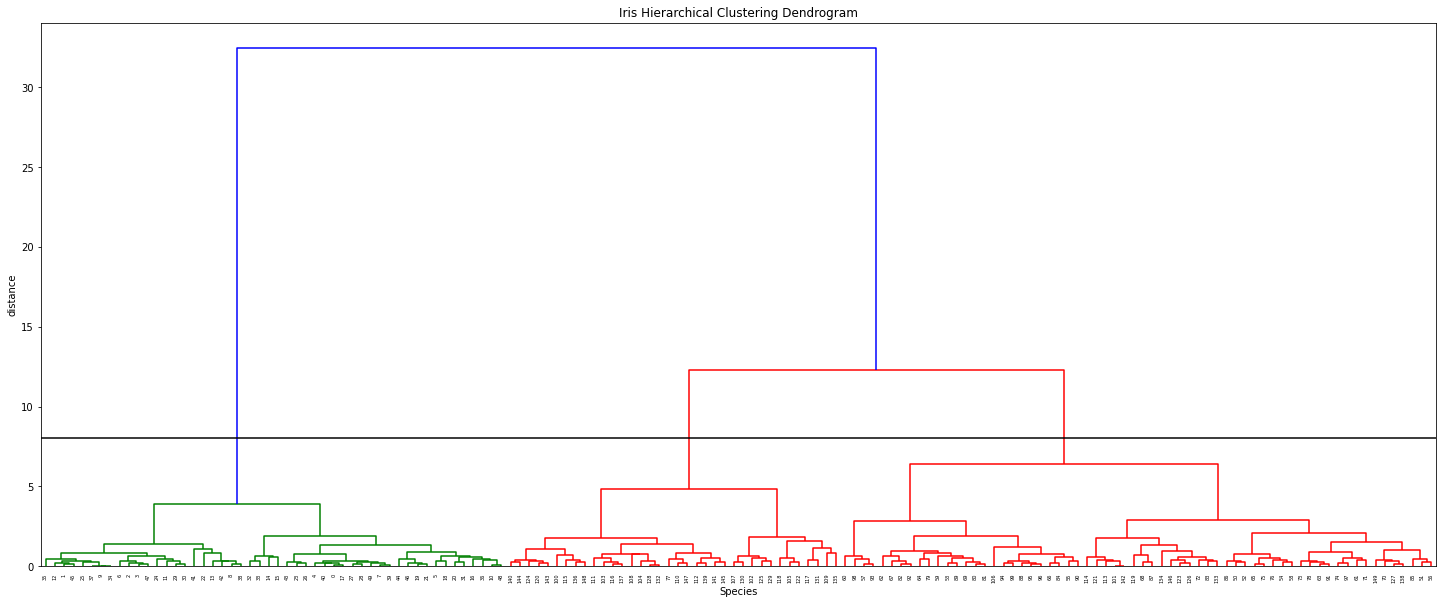

In [21]:
plt.figure(figsize=(25, 10))
# Create a dendrogram
dn = dendrogram(distance_matrix)
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
max_d = 8 # max_d as in max_distance
plt.axhline(y=max_d, c='k')
plt.show();

In [22]:
# performing hierarchical clustering using the created distance_matrix
# documentation of the parameters can be found here https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html
hierarchical_cluster_labels = fcluster(distance_matrix, 3, criterion='maxclust')

Text(0.5, 1.0, 'Actual')

Text(0.5, 1.0, 'Hierarchical Clustering')

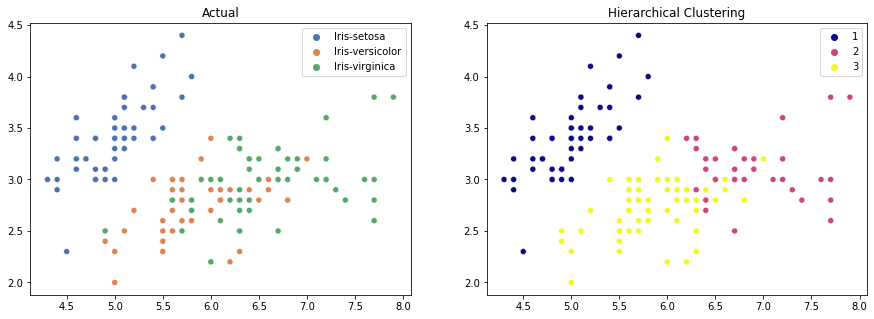

In [23]:
# Plotting actual and generated clusters
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(X[:, 0], X[:, 1], hue=y, ax=axes[0], palette="deep")
axes[0].set_title("Actual")
sns.scatterplot(X[:, 0], X[:, 1], hue=hierarchical_cluster_labels, ax=axes[1], palette="plasma")
axes[1].set_title("Hierarchical Clustering")

### Self-Organizing Map (SOM) algorithm

The SOM algorithm is an unsupervised machine learning algorithm that learns a  low-dimensional representation of large dimensional data while preserving the topological structure of the data. This latter feature is unique among unsupervised learning algorithms. 

Here we are using MiniSom, '*MiniSom is a minimalistic and Numpy based implementation of the Self Organizing Maps (SOM)*'. The documentation is on [GitHub](https://github.com/JustGlowing/minisom).

In [24]:
# Separate the input variables and out variables
t = iris_dataset['class'].astype('category').cat.codes 
data = iris_dataset.iloc[:, [0,1,2,3]] 

# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

# initialization and training of 15x15 SOM
som = MiniSom(15, 15, data.shape[1], sigma=1.5, learning_rate=.7, activation_distance='euclidean',
              topology='hexagonal', neighborhood_function='gaussian', random_seed=10)

som.train(data, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.14314144089980038


In [25]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map() # return the distance map of the weights
weights = som.get_weights() # return the weights of the neural network 

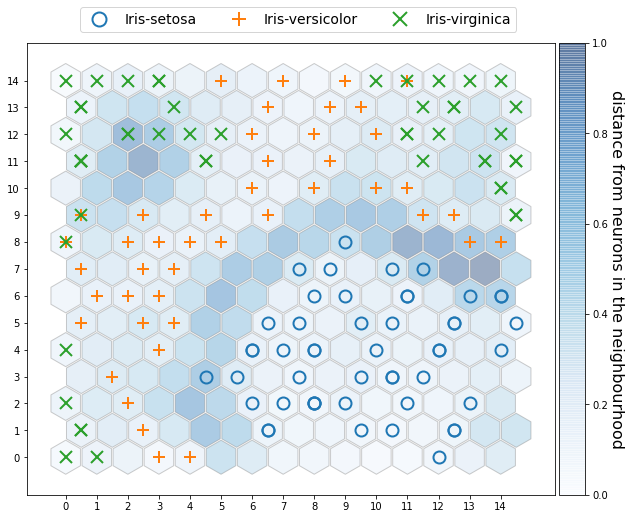

In [26]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

# iteratively add hexagons
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        hex = RegularPolygon((xx[(i, j)], wy), 
                             numVertices=6, 
                             radius=.95 / np.sqrt(3),
                             facecolor=cm.Blues(umatrix[i, j]), 
                             alpha=.4, 
                             edgecolor='gray')
        ax.add_patch(hex)

markers = ['o', '+', 'x']
colors = ['C0', 'C1', 'C2']
for cnt, x in enumerate(data):
    # getting the winner
    w = som.winner(x)
    # place a marker on the winning position for the sample xx
    wx, wy = som.convert_map_to_euclidean(w) 
    wy = wy * np.sqrt(3) / 2
    plt.plot(wx, wy, markers[t[cnt]], markerfacecolor='None', markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)

xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange-.5, xrange)
plt.yticks(yrange * np.sqrt(3) / 2, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 16
cb1.ax.set_ylabel('distance from neurons in the neighbourhood', rotation=270, fontsize=16)
plt.gcf().add_axes(ax_cb)

# add legend
legend_elements = [Line2D([0], [0], marker='o', color='C0', label='Iris-setosa',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='+', color='C1', label='Iris-versicolor',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='x', color='C2', label='Iris-virginica',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2)]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.1, 1.08), loc='upper left', 
          borderaxespad=0., ncol=3, fontsize=14)

plt.show();